# Hotel Booking Dataset
### Objective
- Supervised Learning (Binary Classification problem) by predicting guests would attend or cancel their reservation


## 1. DATA COLLECTION 
- Collect the data from kaggle with CSV format

## 2. EXPLORATORY DATA ANALYSIS & DATA CLEANING
- Statiscial summary
- Dataset shape
- Imbalanced Dataset
- Datatypes (numerical, categorical)
- Categorical (ordinal and nominal)
- Pearson Correlation
- Pie Charts for features 
- Target values visualization 
- Plot Distribution 

## 3. FEATURE ENGINEERING
- Fill Missing Values 
- Binary Classification Problem 
- If model is tree based method, no scaling is needed 
- If model used gradient descent, use scaling (ANN, Linear Regression, Logistic-Regression, etc)
- If scaling is needed, implement Standard Scaler (z-score), Gussian Distribution, etc


## 4. FEATURE SELECTION
- Dropping low variance features 
- Information Gain-Mutual Information in Classification Problems
- Pearson Correlation 
- Fisher Score-ChiSquare Test for Feature Selection
- Tree-based Selection using ExtraTreesClassifier (Feature Importance)
- Univariate Selection 


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint 
import plotly.express as px
import scipy.stats as stats
import pylab
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# DATA COLLECTION

In [2]:
# Import csv file
df = pd.read_csv('../inputs/hotel_bookings.csv')
# Alot of feature engineering and data cleaning for ML training 
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

# EXPLORATORY DATA ANALYSIS 
### Statiscial summary
### Dataset shape
### Datatypes (numerical, categorical)
### Categorical (ordinal and nominal)
### Pearson Correlation
### Pie Charts for features 
### Target values visualization 
### Plot Distribution 

In [3]:
# explore the shape (rows and columns)
print(f'Number of rows of DataFrame {df.shape[0]}')
print(f'Number of columns of DataFrame {df.shape[1]}')

Number of rows of DataFrame 119390
Number of columns of DataFrame 32


In [4]:
# find number of int, float, and object
# must convert all dataset into numbers or bool values
df.dtypes.value_counts()

int64      16
object     12
float64     4
dtype: int64

In [5]:
# collect all dtpyes in 3 classes (object, int, float)
pprint(df.columns.to_series().groupby(df.dtypes).groups)

{dtype('int64'): Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object'),
 dtype('float64'): Index(['children', 'agent', 'company', 'adr'], dtype='object'),
 dtype('O'): Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')}


In [6]:
features = df.columns
numerical_feat = [features for features in df.columns if df[features].dtypes != 'O']
print(f'Number of Numerical Features: {len(numerical_feat)}')

categorical_feat = [features for features in df.columns if df[features].dtypes == 'O']
print(f'Number of Categorical Features: {len(categorical_feat)}')

Number of Numerical Features: 20
Number of Categorical Features: 12


In [7]:
# create a dataframe for dtypes, % of null values, and count of null values 
df_details = pd.DataFrame(df.dtypes).T.rename(index={0:'datatype'})
df_details = df_details.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'num_null_values'}))
df_details = df_details.append(pd.DataFrame(df.isnull().sum()/len(df)*100).T.rename(index={0:'pct_null_values'}))
df_details

hotel is_canceled lead_time arrival_date_year  \
datatype         object       int64     int64             int64   
num_null_values       0           0         0                 0   
pct_null_values     0.0         0.0       0.0               0.0   

                arrival_date_month arrival_date_week_number  \
datatype                    object                    int64   
num_null_values                  0                        0   
pct_null_values                0.0                      0.0   

                arrival_date_day_of_month stays_in_weekend_nights  \
datatype                            int64                   int64   
num_null_values                         0                       0   
pct_null_values                       0.0                     0.0   

                stays_in_week_nights adults  ... deposit_type      agent  \
datatype                       int64  int64  ...       object    float64   
num_null_values                    0      0  ...            0      16340   
pct_null_values                  0.0    0.0  ...          0.0  13.686238   

                   company days_in_waiting_list customer_type      adr  \
datatype           float64                int64        object  float64   
num_null_values     112593                    0             0        0   
pct_null_values  94.306893                  0.0           0.0      0.0   

                required_car_parking_spaces total_of_special_requests  \
datatype                              int64                     int64   
num_null_values                           0                         0   
pct_null_values                         0.0                       0.0   

                reservation_status reservation_status_date  
datatype                    object                  object  
num_null_values                  0                       0  
pct_null_values                0.0                     0.0  

[3 rows x 32 columns]

In [8]:
# statistical summary of object dtypes columns (categorical)
df.describe(include=[np.object])

hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  
count        119390        119390             119390                  119390  
unique            3             4                  3                     926  
top      No Deposit     Transient          Check-Out              2015-10-21  
freq         104641         89613              75166                    1461

In [9]:
# statistical summary of (numerical) dtypes  
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

# IMBALANCED DATASET 

## 37% of target values are canceled reservations

In [10]:
pct_canceled = df.is_canceled.value_counts()[1] /  len(df) * 100
print(f'Percentage of canceled hotel reservations {pct_canceled:0.2f}%')

Percentage of canceled hotel reservations 37.04%


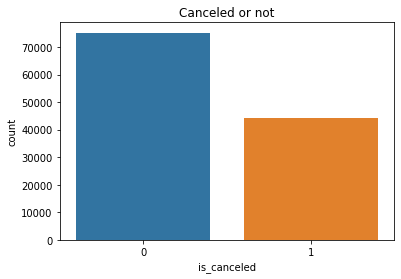

In [11]:
# plot output for cancel 
# Value indicating if the booking was canceled (1) or not (0)
plt.title("Canceled or not")
ax = sns.countplot(x = "is_canceled", data=df)

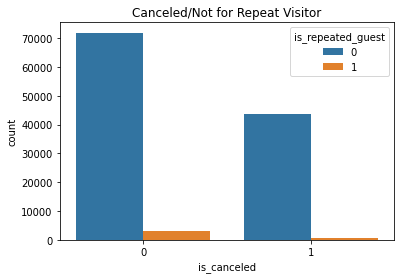

In [12]:
plt.title("Canceled/Not for Repeat Visitor")
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data=df)

# repeated guests do not cancel their reservations.

In [13]:
# pie plot of home country guest that attened booking 
country_data_0 = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
country_data_0.rename(columns={"country": "Number of Guests"}, inplace=True)
country_data_0["Guests in %"] = country_data_0["Number of Guests"] / country_data_0["Number of Guests"].sum()
country_data_0["country"] = country_data_0.index

# pie plot
fig = px.pie(country_data_0,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [14]:
# pie plot of home country guest that canceled (1)
country_data_1 = pd.DataFrame(df.loc[df["is_canceled"] == 1]["country"].value_counts())
country_data_1.rename(columns={"country": "Number of Guests"}, inplace=True)
country_data_1["Guests in %"] = country_data_1["Number of Guests"] / country_data_1["Number of Guests"].sum() * 100
country_data_1["country"] = country_data_1.index

# pie plot
fig = px.pie(country_data_1,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

In [15]:
# get average daily rate for hotel bookings (ADR)
# based on resort or city hotel and reservec type  and when (seasonal prices)
px.box(data_frame = df[df['is_canceled'] == 0], x = 'arrival_date_month', y = 'adr', color = 'hotel')

# April-October City hotels are higher 
# July-August Resort Hotels are higher 

In [16]:
# finding the mean for City and Resort Average Daily Rate (ADR)
df.groupby(['arrival_date_month'])['adr'].mean().sort_values(ascending=False)
# May-August (summer time) prices are higher 

arrival_date_month
August       140.111523
July         126.788013
June         116.672192
May          108.695516
September    105.049657
April        100.380790
October       87.908879
December      81.076776
March         80.679646
November      73.794962
February      73.582276
January       70.361241
Name: adr, dtype: float64

In [17]:
# plot reserved room type and its ADR price for both Resort and City hotels 
px.box(data_frame = df[df['is_canceled'] == 0], x = 'reserved_room_type', y = 'adr', color = 'hotel')

# Type G is the most expensive ADR price 
# Type A is the cheapest ADR price 

In [18]:
# get the total days stayed in and total number of guest 
# boxplot both features
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df['num_guests'] = df['adults'] + df['children'] + df['babies']

df = df.drop(['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces'], axis=1)
px.box(data_frame = df[df['is_canceled'] == 0], x = 'num_guests', y = 'total_nights')

<AxesSubplot:>

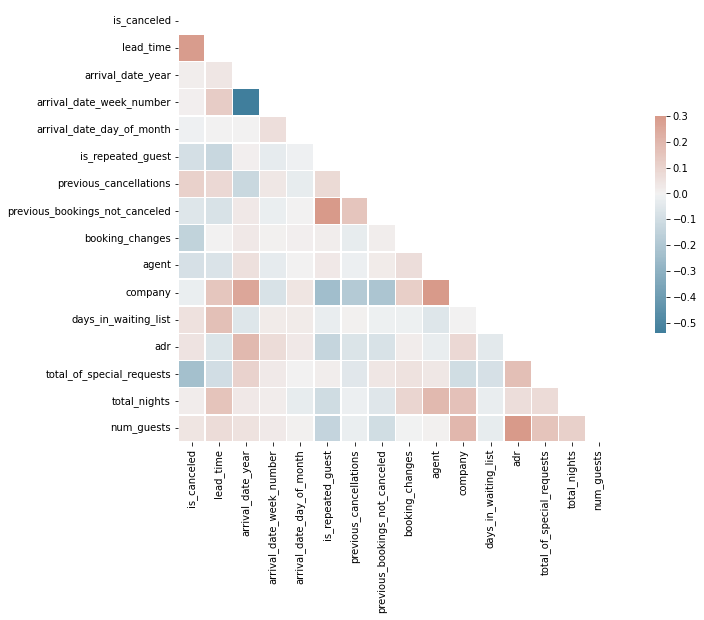

In [19]:
# compute corr array and generate a mask for the upper triangle
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(15,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plt heatmap with mask and ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot:xlabel='market_segment', ylabel='count'>

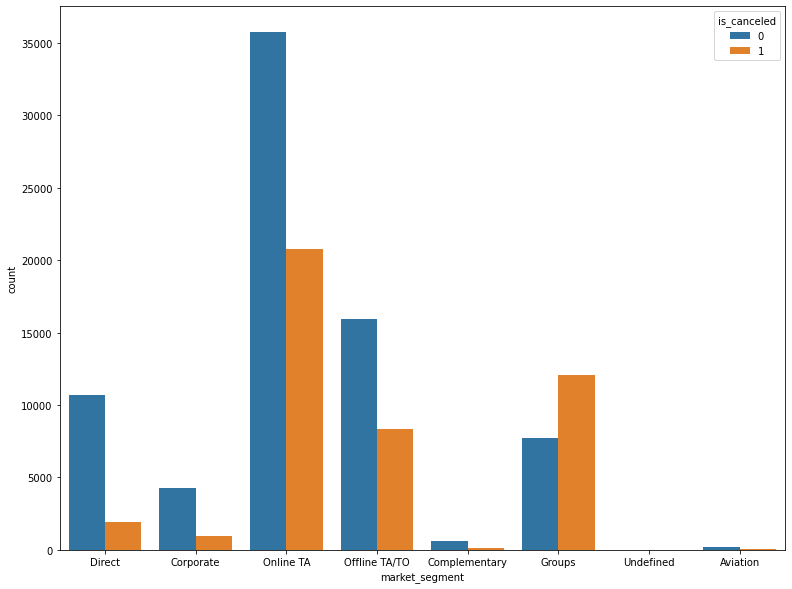

In [20]:
# Total Count for each market segment on Canceled or Not
plt.figure(figsize = (13,10))
sns.countplot(x = "market_segment", hue = 'is_canceled', data = df)

# Groups segment have a higher cancelation rate 

In [21]:
# total count for adults, children and total ADR
# get price per capita 
ppc = df["adr"].sum() / df['num_guests'].sum()
print(f"Price per capita ${ppc:0.2f}")

Price per capita $51.74


In [22]:
canceled_pct  = (df["is_canceled"].sum() / df.shape[0]) * 100
print(f'Total percentage canceled {canceled_pct:0.4}%')

Total percentage canceled 37.04%


In [23]:
canceled_pct_resort = (df.loc[df["hotel"] == "Resort Hotel"]["is_canceled"].sum() / df.loc[df["hotel"] == "Resort Hotel"].shape[0]) * 100
print(f'Total percentage canceled for Resort Hotels: {canceled_pct_resort:0.4}%')

Total percentage canceled for Resort Hotels: 27.76%


In [24]:
canceled_pct_city = (df.loc[df["hotel"] == "City Hotel"]["is_canceled"].sum() / df.loc[df["hotel"] == "City Hotel"].shape[0]) * 100
print(f'Total percentage canceled for City Hotels: {canceled_pct_city:0.4}%')

Total percentage canceled for City Hotels: 41.73%


In [25]:
# find the absolute value of the highest correlation with the target values
df.corr()["is_canceled"].abs().sort_values(ascending=False)[1:].head(10)

lead_time                         0.293123
total_of_special_requests         0.234658
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
num_guests                        0.046506
Name: is_canceled, dtype: float64

# Handle Missing Values

### Drop features 
### Fill Agent features
### Drop Country features 
### Fill Children feature with mean or median 

In [26]:
# create a dataframe for dtypes, % of null values, and count of null values 
df_details = pd.DataFrame(df.dtypes).T.rename(index={0:'datatype'})
df_details = pd.DataFrame(df.isnull().sum()).T.rename(index={0:'num_null_values'})
df_details = df_details.append(pd.DataFrame(df.isnull().sum()/len(df)*100).T.rename(index={0:'pct_null_values'}))
df_details

hotel  is_canceled  lead_time  arrival_date_year  \
num_null_values    0.0          0.0        0.0                0.0   
pct_null_values    0.0          0.0        0.0                0.0   

                 arrival_date_month  arrival_date_week_number  \
num_null_values                 0.0                       0.0   
pct_null_values                 0.0                       0.0   

                 arrival_date_day_of_month  meal     country  market_segment  \
num_null_values                        0.0   0.0  488.000000             0.0   
pct_null_values                        0.0   0.0    0.408744             0.0   

                 ...         agent        company  days_in_waiting_list  \
num_null_values  ...  16340.000000  112593.000000                   0.0   
pct_null_values  ...     13.686238      94.306893                   0.0   

                 customer_type  adr  total_of_special_requests  \
num_null_values            0.0  0.0                        0.0   
pct_null_values            0.0  0.0                        0.0   

                 reservation_status  reservation_status_date  total_nights  \
num_null_values                 0.0                      0.0           0.0   
pct_null_values                 0.0                      0.0           0.0   

                 num_guests  
num_null_values     4.00000  
pct_null_values     0.00335  

[2 rows x 28 columns]

In [27]:
df_details.iloc[1].sort_values(ascending=False).head(5)
# Company, Agent, Country and Children have null values 

company               94.306893
agent                 13.686238
country                0.408744
num_guests             0.003350
assigned_room_type     0.000000
Name: pct_null_values, dtype: float64

# Dropping Company Feature
### Company has ~94% of null values

In [28]:
df.drop('company', axis=1, inplace=True)

<AxesSubplot:>

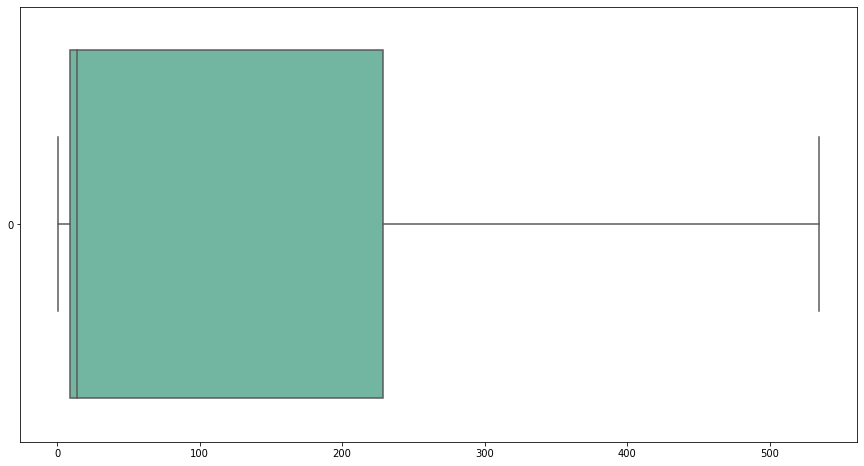

In [29]:
plt.subplots(figsize=(15,8))
sns.boxplot(data=df['agent'], orient="h", palette="Set2")

<AxesSubplot:xlabel='agent', ylabel='Count'>

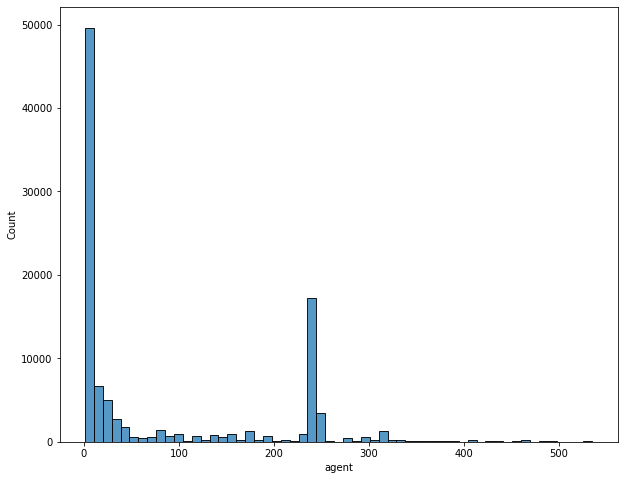

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(df.agent)

In [31]:
df['agent'].fillna(df['agent'].median(), inplace = True)
print(df['agent'].mean())

76.74439232766564


In [32]:
# For Country, there's 177 unique values (countries)
# drop the column 
df.country.isnull().sum() / len(df) * 100
df = df.dropna()

# Catogorical Features 

## Ordinal & Nominal

In [33]:
# create a list of all object/categorical columns and explore 
categorical_feat = list(df.select_dtypes(include=['object']).columns)
categorical_feat = df[categorical_feat]
categorical_feat

hotel arrival_date_month meal country market_segment  \
0       Resort Hotel               July   BB     PRT         Direct   
1       Resort Hotel               July   BB     PRT         Direct   
2       Resort Hotel               July   BB     GBR         Direct   
3       Resort Hotel               July   BB     GBR      Corporate   
4       Resort Hotel               July   BB     GBR      Online TA   
...              ...                ...  ...     ...            ...   
119385    City Hotel             August   BB     BEL  Offline TA/TO   
119386    City Hotel             August   BB     FRA      Online TA   
119387    City Hotel             August   BB     DEU      Online TA   
119388    City Hotel             August   BB     GBR      Online TA   
119389    City Hotel             August   HB     DEU      Online TA   

       distribution_channel reserved_room_type assigned_room_type  \
0                    Direct                  C                  C   
1                    Direct                  C                  C   
2                    Direct                  A                  C   
3                 Corporate                  A                  A   
4                     TA/TO                  A                  A   
...                     ...                ...                ...   
119385                TA/TO                  A                  A   
119386                TA/TO                  E                  E   
119387                TA/TO                  D                  D   
119388                TA/TO                  A                  A   
119389                TA/TO                  A                  A   

       deposit_type customer_type reservation_status reservation_status_date  
0        No Deposit     Transient          Check-Out              2015-07-01  
1        No Deposit     Transient          Check-Out              2015-07-01  
2        No Deposit     Transient          Check-Out              2015-07-02  
3        No Deposit     Transient          Check-Out              2015-07-02  
4        No Deposit     Transient          Check-Out              2015-07-03  
...             ...           ...                ...                     ...  
119385   No Deposit     Transient          Check-Out              2017-09-06  
119386   No Deposit     Transient          Check-Out              2017-09-07  
119387   No Deposit     Transient          Check-Out              2017-09-07  
119388   No Deposit     Transient          Check-Out              2017-09-07  
119389   No Deposit     Transient          Check-Out              2017-09-07  

[118898 rows x 12 columns]

In [34]:
categorical_feat.describe(include=[np.object])

hotel arrival_date_month    meal country market_segment  \
count       118898             118898  118898  118898         118898   
unique           2                 12       5     177              7   
top     City Hotel             August      BB     PRT      Online TA   
freq         79302              13852   91863   48586          56402   

       distribution_channel reserved_room_type assigned_room_type  \
count                118898             118898             118898   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97730              85601              73863   

       deposit_type customer_type reservation_status reservation_status_date  
count        118898        118898             118898                  118898  
unique            3             4                  3                     926  
top      No Deposit     Transient          Check-Out              2015-10-21  
freq         104163         89174              74745                    1461

# Mean Encoding

In [35]:
mean_ordinal = df.groupby(['deposit_type'])['is_canceled'].mean().to_dict()
df['deposit_type_mean_ordinal']=df['deposit_type'].map(mean_ordinal)

# One Hot Encoding with many Categories 

In [36]:
# One Hot Encoding with many Categories 
df.country.value_counts().sort_values(ascending=False)
# get the top ten 
top_10 = df.country.value_counts().sort_values(ascending=False).head(10).index
# for loop categories in top_10 list
for cate in top_10:
    df[cate] = np.where(df['country']==cate, 1, 0)

# Drop Non-informative Features

In [37]:
drop_col = ['country', 'reservation_status_date', 'assigned_room_type']
df.drop(drop_col, axis=1, inplace=True)
categorical_feat.drop(drop_col, axis=1, inplace=True)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
# printing unique values of each column
for col in categorical_feat.columns:
    print(f"{col}: {categorical_feat[col].unique()}\n")

hotel: ['Resort Hotel' 'City Hotel']

arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation']

distribution_channel: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B' 'P']

deposit_type: ['No Deposit' 'Refundable' 'Non Refund']

customer_type: ['Transient' 'Contract' 'Transient-Party' 'Group']

reservation_status: ['Check-Out' 'Canceled' 'No-Show']



In [39]:
month_map = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December': 12}
df['arrival_date_month'] = df.arrival_date_month.map(month_map)

In [40]:
room_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
df['reserved_room_type'] = df.reserved_room_type.map(room_map)
df.reserved_room_type.value_counts()

1.0    85601
4.0    19173
5.0     6497
6.0     2890
7.0     2083
2.0     1114
3.0      931
8.0      601
Name: reserved_room_type, dtype: int64

# Nominal Categories 

In [41]:
from sklearn.preprocessing import LabelEncoder

nominal_features = ['hotel', 'customer_type','meal','arrival_date_month','market_segment','distribution_channel','deposit_type', 'customer_type','reservation_status']
for i in nominal_features:
    df[i] = LabelEncoder().fit_transform(df[i]) 
df

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0           1            0        342               2015                   6   
1           1            0        737               2015                   6   
2           1            0          7               2015                   6   
3           1            0         13               2015                   6   
4           1            0         14               2015                   6   
...       ...          ...        ...                ...                 ...   
119385      0            0         23               2017                   7   
119386      0            0        102               2017                   7   
119387      0            0         34               2017                   7   
119388      0            0        109               2017                   7   
119389      0            0        205               2017                   7   

        arrival_date_week_number  arrival_date_day_of_month  meal  \
0                             27                          1     0   
1                             27                          1     0   
2                             27                          1     0   
3                             27                          1     0   
4                             27                          1     0   
...                          ...                        ...   ...   
119385                        35                         30     0   
119386                        35                         31     0   
119387                        35                         31     0   
119388                        35                         31     0   
119389                        35                         29     2   

        market_segment  distribution_channel  ...  PRT  GBR  FRA  ESP  DEU  \
0                    3                     1  ...    1    0    0    0    0   
1                    3                     1  ...    1    0    0    0    0   
2                    3                     1  ...    0    1    0    0    0   
3                    2                     0  ...    0    1    0    0    0   
4                    6                     3  ...    0    1    0    0    0   
...                ...                   ...  ...  ...  ...  ...  ...  ...   
119385               5                     3  ...    0    0    0    0    0   
119386               6                     3  ...    0    0    1    0    0   
119387               6                     3  ...    0    0    0    0    1   
119388               6                     3  ...    0    1    0    0    0   
119389               6                     3  ...    0    0    0    0    1   

        ITA  IRL  BEL  BRA  NLD  
0         0    0    0    0    0  
1         0    0    0    0    0  
2         0    0    0    0    0  
3         0    0    0    0    0  
4         0    0    0    0    0  
...     ...  ...  ...  ...  ...  
119385    0    0    1    0    0  
119386    0    0    0    0    0  
119387    0    0    0    0    0  
119388    0    0    0    0    0  
119389    0    0    0    0    0  

[118898 rows x 35 columns]

In [42]:
pprint(df.columns.to_series().groupby(df.dtypes).groups)

{dtype('int64'): Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'total_of_special_requests',
       'reservation_status', 'total_nights', 'PRT', 'GBR', 'FRA', 'ESP', 'DEU',
       'ITA', 'IRL', 'BEL', 'BRA', 'NLD'],
      dtype='object'),
 dtype('float64'): Index(['reserved_room_type', 'agent', 'adr', 'num_guests',
       'deposit_type_mean_ordinal'],
      dtype='object')}


# Feature Selection
### - Fill Missing Values 
### - If model is tree based method, no scaling is needed 
### - If model used gradient descent, use scaling (ANN, Linear Regression, Logistic-Regression, etc)
### - If scaling is needed, implement Standard Scaler (z-score), Gussian Distribution, etc


In [43]:
df.isnull().sum().sum()

8

In [44]:
df.columns[df.isnull().any()].tolist()

['reserved_room_type']

<AxesSubplot:>

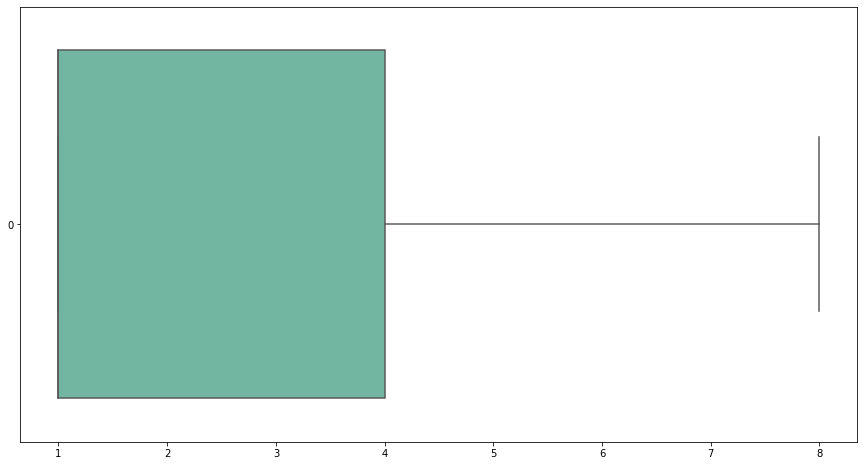

In [45]:
plt.subplots(figsize=(15,8))
sns.boxplot(data=df['reserved_room_type'], orient="h", palette="Set2")

In [46]:
df.reserved_room_type = df.reserved_room_type.fillna(round(df.reserved_room_type.mean(), 1))

In [47]:
# plot two diagram (distribution histogram and boxplot)
def plot_distribution(df, feature):
	plt.figure(figsize=(10,6))
	# first row, 1st column
	plt.subplot(1, 2, 1)
	df[feature].hist()
	# first row, 2 column
	plt.subplot(1, 2, 2)
	stats.probplot(df[feature], dist='norm', plot=pylab)
	plt.show()

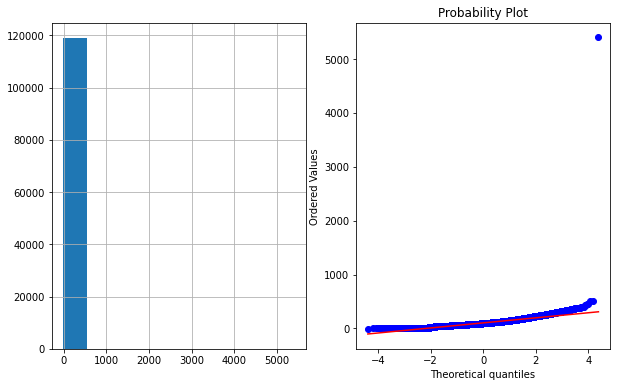

In [48]:
plot_distribution(df, 'adr')

In [49]:
print(f'Outlier of ADR feature:{df.adr.max()}')
df.drop(df['adr'].idxmax(),inplace=True)
print(f"Filter out outlier ADR feature: {df.adr.max()}")

Outlier of ADR feature:5400.0
Filter out outlier ADR feature: 510.0


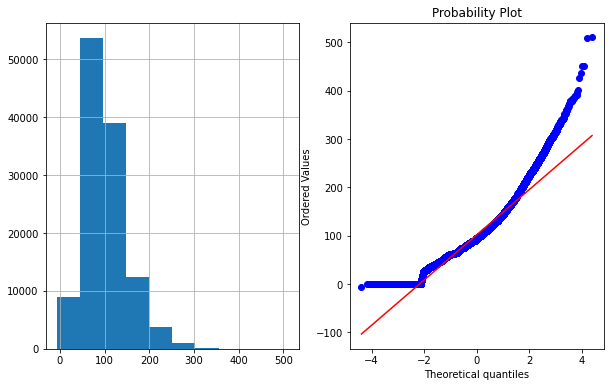

In [50]:
plot_distribution(df, 'adr')

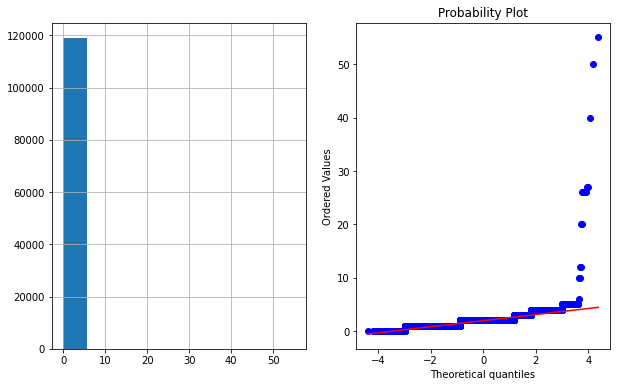

In [51]:
plot_distribution(df, 'num_guests')

<AxesSubplot:>

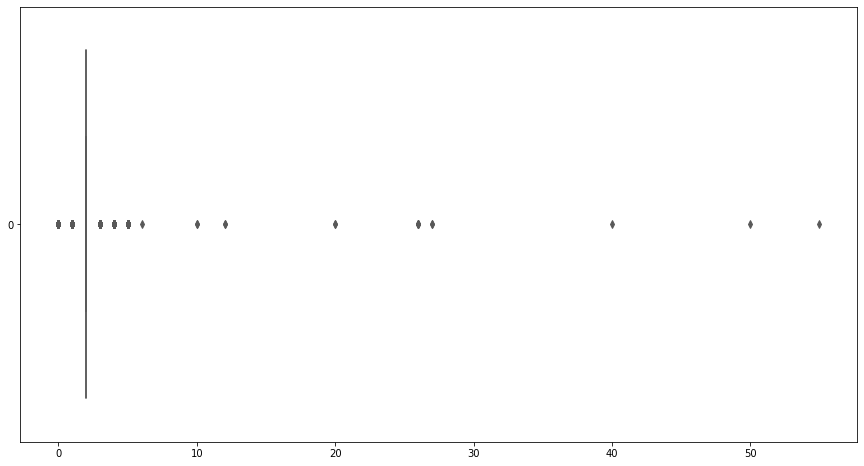

In [52]:
plt.subplots(figsize=(15,8))
sns.boxplot(data=df['num_guests'], orient="h", palette="Set2")

In [53]:
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(df.num_guests))
#only keep rows in dataframe with all z-scores less than absolute value of 3 
df.num_guests = df.num_guests[(z<3)]
df.dropna(inplace=True)


# FEATURE SELECTION
## Dropping low variance features 
## Information Gain-Mutual Information in Classification Problems
## Pearson Correlation 
## Fisher Score-ChiSquare Test for Feature Selection
## Tree-based Selection using ExtraTreesClassifier (Feature Importance)
## Univariate Selection 

# DATA LEAKAGE 
### Leakage is present if information between training and test sets is shared

In [54]:
df.drop(['reservation_status', 'arrival_date_year'], axis=1, inplace=True)

<AxesSubplot:>

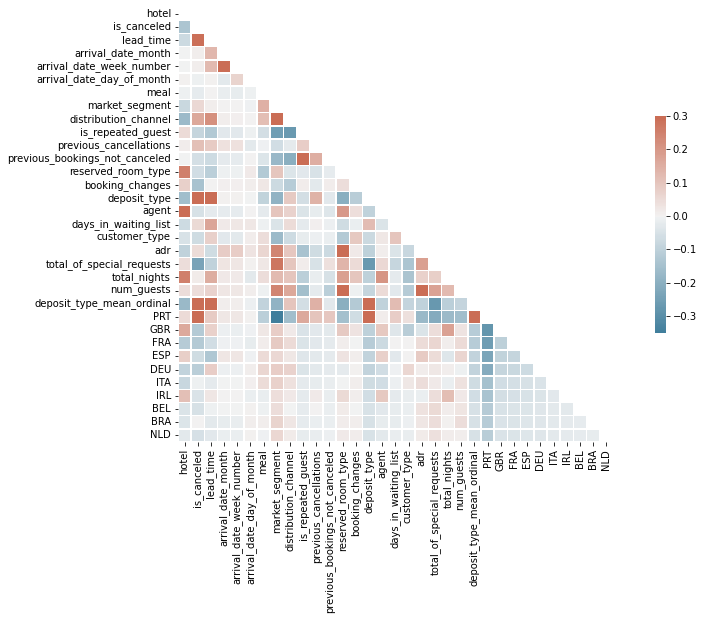

In [55]:
# compute corr array and generate a mask for the upper triangle
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(15,8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plt heatmap with mask and ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [56]:
# Never drop an independent feature that is highly correlated with dependent features
# Remove featuers from the IV that are highly correlated with each other (over 90%). Can behave like a duplicate feature
def drop_corr(df, threshold):
	# set of all the names of correlated columns
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
			# get the coefficient value
            if corr_matrix.iloc[i, j] > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    
corr_features = drop_corr(df, 0.90)
print(corr_features)
df.drop(corr_features, axis=1, inplace=True)


{'arrival_date_week_number', 'deposit_type_mean_ordinal'}


In [57]:
targets = df.is_canceled
features = df.drop('is_canceled', axis=1)

Index(['hotel', 'lead_time', 'arrival_date_month', 'arrival_date_day_of_month',
       'meal', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'total_of_special_requests', 'total_nights', 'num_guests', 'PRT', 'GBR',
       'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD'],
      dtype='object')


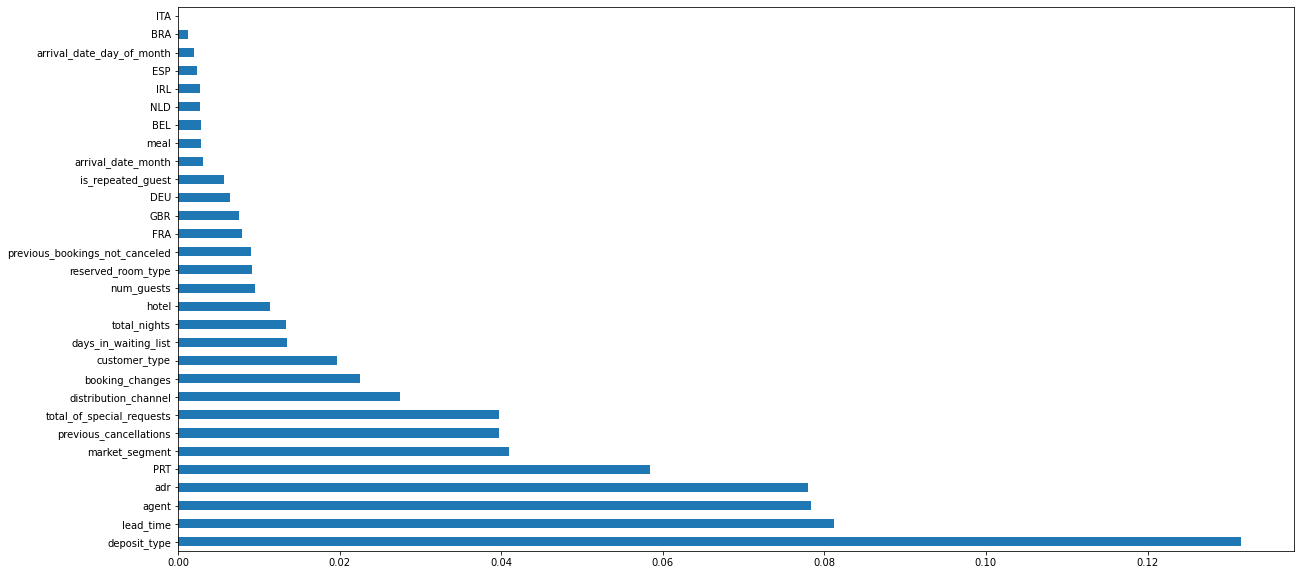

In [58]:
# determine the mutual information for classification 
# output a value between [0,1], the higher the value the more dependent on target values
mutual_info = mutual_info_classif(features, targets)
# convert into series and get column names 
mutual_info = pd.Series(mutual_info)
mutual_info.index = features.columns

# plot ordered mutual_info values per feature 
mutual_info.sort_values(ascending=False).plot(kind='barh', figsize=(20,10))
print(mutual_info.index)


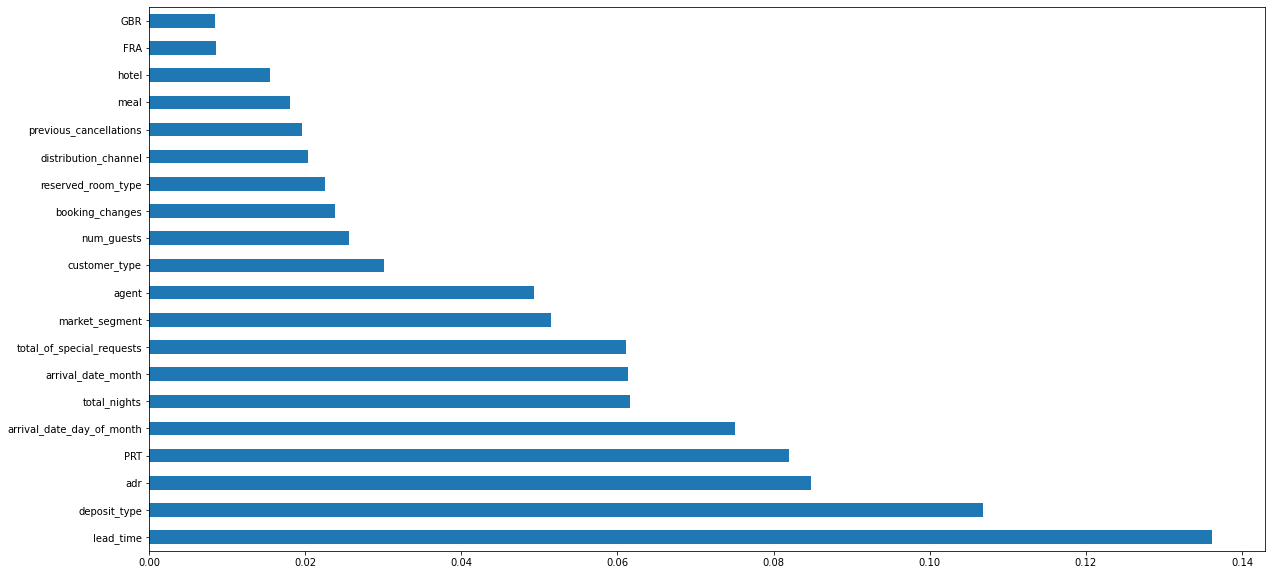

Index(['lead_time', 'deposit_type', 'adr', 'PRT', 'arrival_date_day_of_month',
       'total_nights', 'arrival_date_month', 'total_of_special_requests',
       'market_segment', 'agent', 'customer_type', 'num_guests',
       'booking_changes', 'reserved_room_type', 'distribution_channel',
       'previous_cancellations', 'meal', 'hotel', 'FRA', 'GBR'],
      dtype='object')


In [59]:
model = ExtraTreesClassifier()
model.fit(features, targets)

# plot the feature importance
feat_importance = pd.Series(model.feature_importances_, index = features.columns)
feat_importance.nlargest(20).plot(kind='barh', figsize=(20,10))
plt.show()
print(feat_importance.nlargest(20).index)


In [60]:
scaler = MinMaxScaler()

df_minmax = scaler.fit_transform(df)
df_minmax = pd.DataFrame(df_minmax, columns = df.columns)
targets_minmax = df_minmax.is_canceled
features_minmax = df_minmax.drop('is_canceled', axis=1)

<AxesSubplot:>

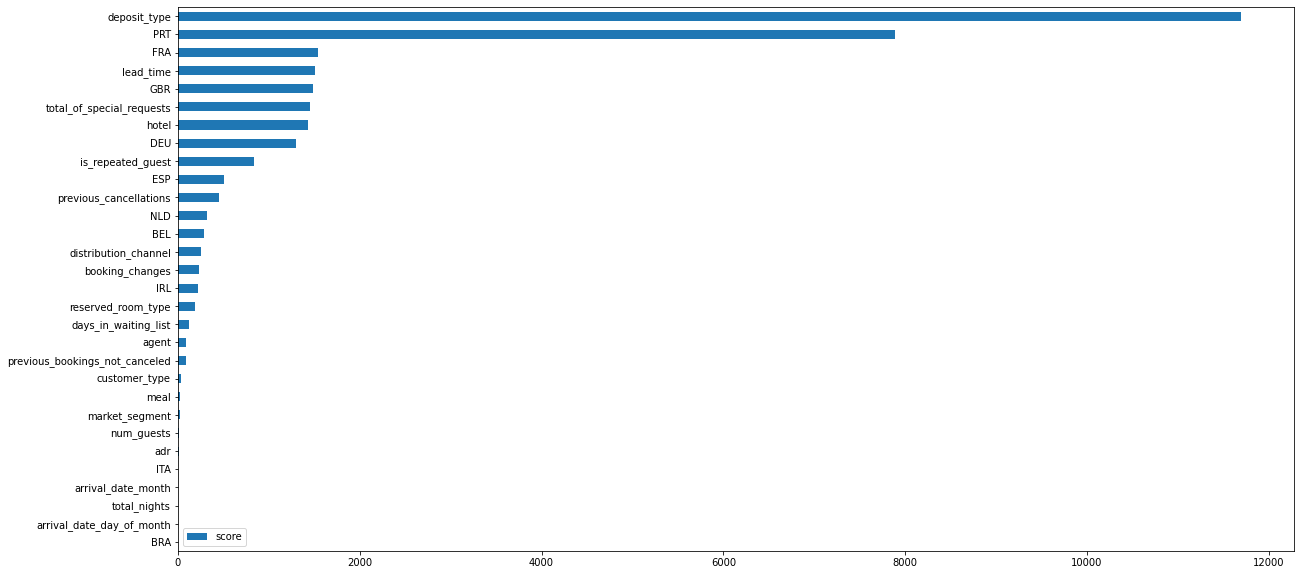

In [61]:
best_features = SelectKBest(score_func=chi2, k=20)
fit = best_features.fit(features_minmax, targets_minmax) 

# get a dataframe of score and column names
df_scores = pd.DataFrame(fit.scores_)
df_col = pd.DataFrame(features_minmax.columns)

# concat borth dataframes
feat_scores = pd.concat([df_col, df_scores], axis=1)
feat_scores.columns = ['features', 'score']
feat_scores.index = features_minmax.columns
# feat_scores.plot(kind='barh', figsize=(20,10))
feat_scores.sort_values(by='score').plot(kind='barh', figsize=(20,10))

# get top 20 features using Chi2
# print(feat_scores.nlargest(20, 'score'))

# Feature Scaling 
- Feeding into a Artificial Neural Network
- ANN uses Gradient Descent to find global mininum faster
- Transform using MinMaxScaler

In [62]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [63]:
hotel_chi2= df[['is_canceled', 'deposit_type', 'PRT', 'FRA', 'lead_time', 'GBR', 'total_of_special_requests', 'hotel','DEU', 'is_repeated_guest', 'ESP', 'previous_cancellations', 'NLD', 'BEL', 'distribution_channel', 'booking_changes', 'IRL', 'reserved_room_type', 'days_in_waiting_list', 'agent', 'previous_bookings_not_canceled']]
hotel_chi2.shape

(118743, 21)

In [64]:
hotel_feat_importance = df[['is_canceled', 'lead_time', 'deposit_type', 'adr', 'PRT', 'arrival_date_day_of_month','total_nights', 'arrival_date_month', 'total_of_special_requests','agent', 'market_segment', 'customer_type', 'num_guests','booking_changes', 'reserved_room_type', 'distribution_channel','previous_cancellations', 'meal', 'hotel', 'GBR', 'FRA']]
hotel_feat_importance.shape

(118743, 21)

In [65]:
hotel_mutual_info = df[['is_canceled', 'hotel', 'lead_time', 'market_segment', 'distribution_channel', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'total_of_special_requests', 'total_nights', 'num_guests', 'PRT', 'GBR', 'FRA', 'DEU']]
hotel_mutual_info.shape

(118743, 21)

In [66]:
hotel_chi2.to_csv('../inputs/hotel_chi2.csv', index=False)
hotel_feat_importance.to_csv('../inputs/hotel_feat_importance.csv', index=False)
hotel_mutual_info.to_csv('../inputs/hotel_mutual_info.csv', index=False)
